# Analiza eksploracyjna oraz porównawcza skuteczności metod modelowania w predykcji prawdopodobieństwa wyświetlenia reklamy przez użytkownika strony internetowej


Zbiór obejmuje 100000 obserwacji i 7 kolumn:
- ip: adres IP użytkownika
- variant: kod wariantu reklamy wyświetlanego użytkownikowi
- device: kod typu urządzenia (telefonu komórkowego) użytkownika
- os: kod wariantu system operacyjnego urządzenia użytkownika
- channel: kanał, w którym reklama została wyświetlona 
- click_time: znacznik czasu wyświetlenia reklamy (UTC)
- is_clicked: informacja czy reklama została kliknięta (0 = NIE, 1 = TAK) 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('add_clicks.csv')

In [3]:
df.head()

,ip,variant,device,os,channel,click_time,is_clicked
0,87540,12,1,13,497,2017-11-07 09:30,0
1,105560,25,1,17,259,2017-11-07 13:40,0
2,101424,12,1,19,212,2017-11-07 18:05,0
3,94584,13,1,13,477,2017-11-07 04:58,0
4,68413,12,1,1,178,2017-11-09 09:00,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   ip          100000 non-null  int64 
 1   variant     100000 non-null  int64 
 2   device      100000 non-null  int64 
 3   os          100000 non-null  int64 
 4   channel     100000 non-null  int64 
 5   click_time  100000 non-null  object
 6   is_clicked  100000 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 5.3+ MB


W badanym zbiorze znajduje się 100000 obserwacji w siedmiu kolumnach, z czego sześć jest liczbą, a jedna datą.

In [5]:
df.describe()

,ip,variant,device,os,channel,is_clicked
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,91255.879670,12.04788,21.771250,22.818280,268.832460,0.002270
std,69835.553661,14.94150,259.667767,55.943136,129.724248,0.047591
min,9.000000,1.00000,0.000000,0.000000,3.000000,0.000000
25%,40552.000000,3.00000,1.000000,13.000000,145.000000,0.000000
50%,79827.000000,12.00000,1.000000,18.000000,258.000000,0.000000
75%,118252.000000,15.00000,1.000000,19.000000,379.000000,0.000000
max,364757.000000,551.00000,3867.000000,866.000000,498.000000,1.000000


W powyższej tabeli można zauważyć statystyczne zestawienie poszczególnych zmiennych.

# Analiza eksploracyjna

Pierwszym krokiem prowadzącym do wykonanania analizy eksploracyjnej na badanym zbiorze danych jest przygotowanie danych, czyli m.in sprawdzenie, czy zawiera on jakiekolwiek braki, które mogły by być uzupełnione.

In [6]:
df.isnull()

,ip,variant,device,os,channel,click_time,is_clicked
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,False
99996,False,False,False,False,False,False,False
99997,False,False,False,False,False,False,False
99998,False,False,False,False,False,False,False


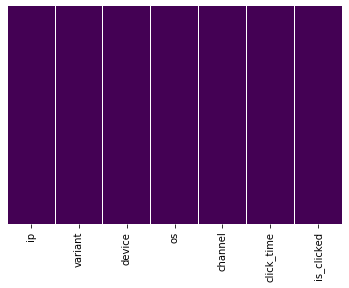

In [7]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False,cmap='viridis')

Biorąc pod uwagę powyższy wykres, można zauważyć, że w badanym zbiorze danych nie ma braków danych, dzięki czemu można bez problemu przejść do dalszej analizy.

Następnym krokiem będzie zbadanie klasy. W poniższej analizie widać, że klasa jest niezrównoważona, przy czym reklama nie została kliknięta 99773 razy, a kilknięta tylko 227 razy.

In [8]:
df['is_clicked'].value_counts()

0    99773
1      227
Name: is_clicked, dtype: int64

Text(0.5, 1.0, 'Ads clicked count')

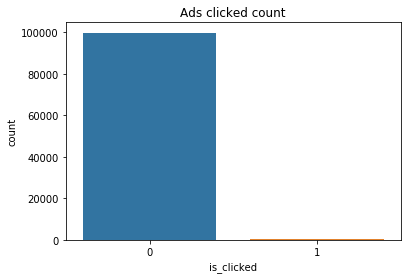

In [9]:
sns.countplot(x='is_clicked',data=df)
plt.title('Ads clicked count')

Następnie sprawdzono poszczególne zmienne oraz przedstawiono ich zalezności na wykresach. Można zauważyć, że najczęściej wyświetlaną reklamą jest ta z kodem 3, którą to pokazano 18279 razy. Drugą w kolejności jest reklama z kodem 12 i wyświetleniami w liczbie 13198. Trzecią z kolei jest reklama z kodem 2, którą wyświetlono 11737 razy.

In [10]:
df.head()

,ip,variant,device,os,channel,click_time,is_clicked
0,87540,12,1,13,497,2017-11-07 09:30,0
1,105560,25,1,17,259,2017-11-07 13:40,0
2,101424,12,1,19,212,2017-11-07 18:05,0
3,94584,13,1,13,477,2017-11-07 04:58,0
4,68413,12,1,1,178,2017-11-09 09:00,0


In [11]:
df['variant'].value_counts().head(5)

3     18279
12    13198
2     11737
9      8992
15     8595
Name: variant, dtype: int64

Text(0.5, 1.0, 'Channel & Variant')

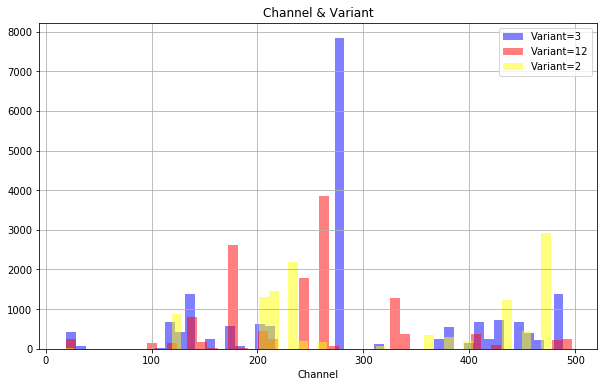

In [12]:
plt.figure(figsize=(10,6))
df[df['variant']==3]['channel'].hist(alpha=0.5,color='blue',
                                              bins=50,label='Variant=3')
df[df['variant']==12]['channel'].hist(alpha=0.5,color='red',
                                              bins=50,label='Variant=12')
df[df['variant']==2]['channel'].hist(alpha=0.5,color='yellow',
                                              bins=50,label='Variant=2')
plt.legend()
plt.xlabel('Channel')
plt.title('Channel & Variant')

Na powyższym wykresie można zauważyć, że najczęściej wyświetlana reklama jest pokazywana na kanale ok.280. Natomiast druga z kolei najczęściej jest wyświetlana na kanale ok. 245, co potwierdzają poniższe wyszukiwania.

In [13]:
df['device'].value_counts().head(5)

1       94338
2        4345
0         541
3032      371
3543      151
Name: device, dtype: int64

In [14]:
df['channel'].value_counts().head(5)

280    8114
245    4802
107    4543
477    3960
134    3224
Name: channel, dtype: int64

W następnych kroku przekształcono kolumnę 'click_time' w dodatkowe zmienne, które ułatwiają dalszą eksplorację.

In [15]:
type(df['click_time'].iloc[0])

str

In [16]:
df['click_time'] = pd.to_datetime(df['click_time'])

In [17]:
df['Hour'] = df['click_time'].apply(lambda time: time.hour)
df['Day of Week'] = df['click_time'].apply(lambda time: time.dayofweek)

In [18]:
df.head()

,ip,variant,device,os,channel,click_time,is_clicked,Hour,Day of Week
0,87540,12,1,13,497,2017-11-07 09:30:00,0,9,1
1,105560,25,1,17,259,2017-11-07 13:40:00,0,13,1
2,101424,12,1,19,212,2017-11-07 18:05:00,0,18,1
3,94584,13,1,13,477,2017-11-07 04:58:00,0,4,1
4,68413,12,1,1,178,2017-11-09 09:00:00,0,9,3


In [19]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [20]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [21]:
df.head()

,ip,variant,device,os,channel,click_time,is_clicked,Hour,Day of Week
0,87540,12,1,13,497,2017-11-07 09:30:00,0,9,Tue
1,105560,25,1,17,259,2017-11-07 13:40:00,0,13,Tue
2,101424,12,1,19,212,2017-11-07 18:05:00,0,18,Tue
3,94584,13,1,13,477,2017-11-07 04:58:00,0,4,Tue
4,68413,12,1,1,178,2017-11-09 09:00:00,0,9,Thu


Dodane zmienne zwizualizowano na poniższych wykresach. Na pierwszym z nich można zauważyć, że reklamy najczęściej były wyświetlane w środy oraz wtorki i czwartki, co znacząco wskazuje na zdecydowane zwiększenie się natężenia ruchu na stronie internetowej w dni robocze. Najmniej reklam było wyświetlanych w poniedziałki, co może tłumaczyć fakt, że jest to zawsze pierwszy dzień tygodnia, podczas którego ludzie spędzają mało czasu w internecie skupiając się na nowych obowiązkach.

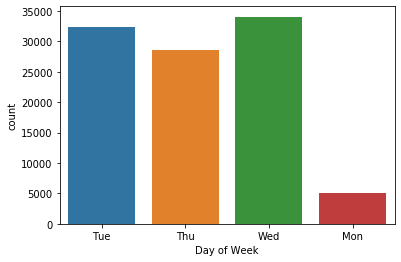

In [22]:
sns.countplot(x='Day of Week',data=df)

Następnie zbadano godziny, w których to reklama była wyświetlana najczęściej. Okazało się, że są to godziny poranne oraz południowe, co jeszcze bardziej utwierdza w przekonaniu, że strona internetowa najczęściej odwiedzana jest przed lub w czasie pracy.

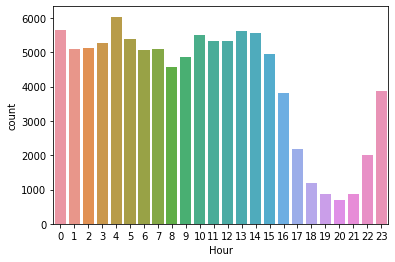

In [23]:
sns.countplot(x='Hour',data=df)

Następnym krokiem było podzielenie zbioru danych na zbiór treningowy i testowy według proporcji 70/30 z zachowaniem możliwości odtworzenia podziału.

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
training_data, testing_data = train_test_split(df,test_size=0.3,random_state=42)

In [26]:
print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 70000
No. of testing examples: 30000


In [27]:
training_data.head()

,ip,variant,device,os,channel,click_time,is_clicked,Hour,Day of Week
76513,116708,3,1,15,135,2017-11-08 14:17:00,0,14,Wed
60406,167094,14,1,19,134,2017-11-08 17:26:00,0,17,Wed
27322,42192,2,1,19,477,2017-11-06 16:12:00,0,16,Mon
53699,45929,26,1,13,121,2017-11-07 11:34:00,0,11,Tue
65412,32356,232,3866,866,347,2017-11-09 02:16:00,0,2,Thu


Na zbiorze treningowym zbadano zależności między zmienną celu a poszczególnymi predyktorami. Wcześniej dokonano analizy dotyczącej tylko wyświetlania reklam. Teraz, postarano się przedstawić kiedy najczęściej klikano w wyświetlaną reklamę. Okazało się, że proporcje zostały zachowane i najczęściej klikano w nią też głównie w środy, wtorki i czwartki.

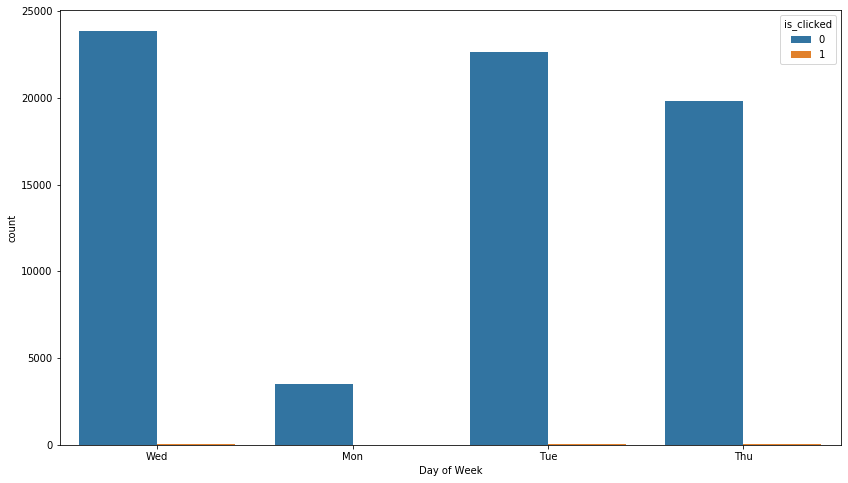

In [28]:
plt.figure(figsize=(14,8))
sns.countplot(x='Day of Week',data=training_data,hue='is_clicked')

(0, 100)

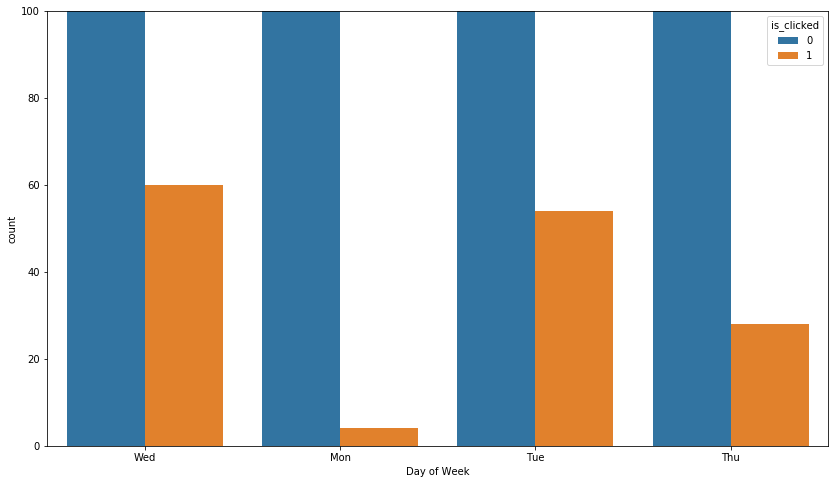

In [29]:
plt.figure(figsize=(14,8))
sns.countplot(x='Day of Week',data=training_data,hue='is_clicked')
plt.ylim((0,100))

Następnie zobaczono, w jakich godzinach użytkownicy najczęściej klikali w reklamę. Okazało się, że również były to godziny poranne/nocne i południowe.

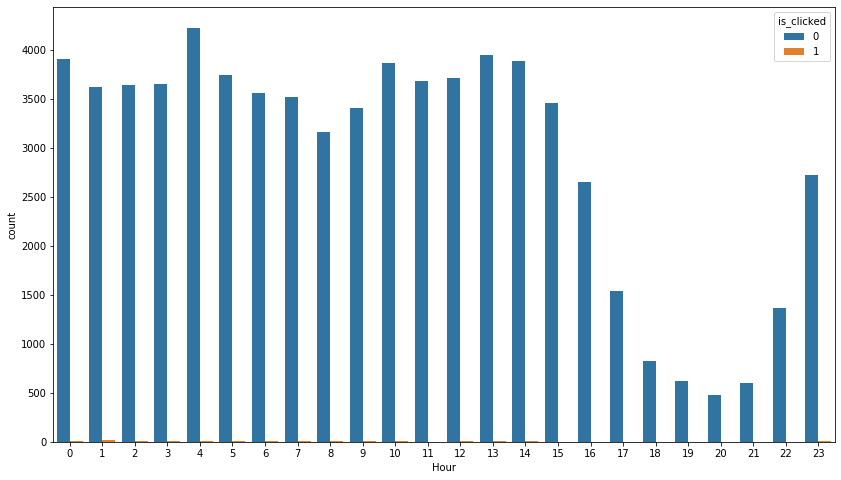

In [30]:
plt.figure(figsize=(14,8))
sns.countplot(x='Hour',data=training_data,hue='is_clicked')

(0, 20)

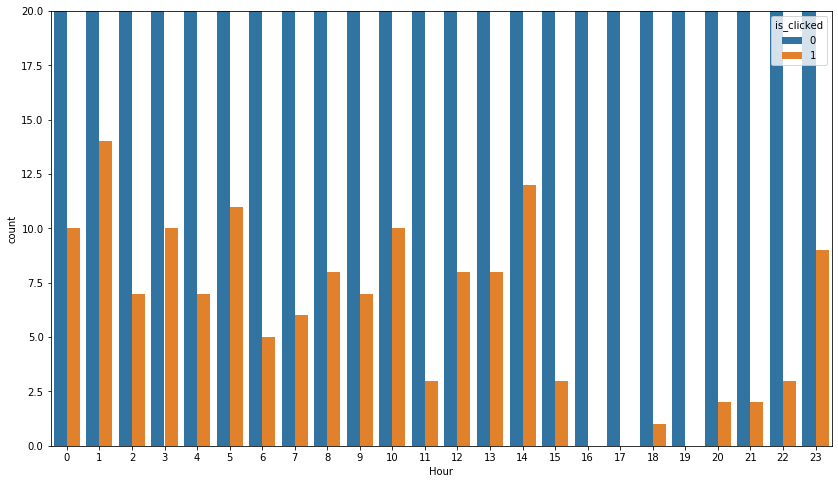

In [31]:
plt.figure(figsize=(14,8))
sns.countplot(x='Hour',data=training_data,hue='is_clicked')
plt.ylim((0,20))

Kolejnym krokie było sprawdzenie, na którym kanale użytkownicy strony internetowej najczęściej klikali w reklamę. Okazało się, że był to kanał 213, następnie 113 oraz 21.

Text(0.5, 0, 'Channel')

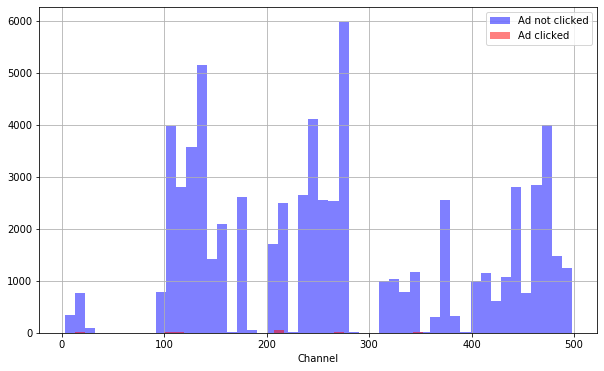

In [32]:
plt.figure(figsize=(10,6))
training_data[training_data['is_clicked']==0]['channel'].hist(alpha=0.5,color='blue',
                                              bins=50,label='Ad not clicked')
training_data[training_data['is_clicked']==1]['channel'].hist(alpha=0.5,color='red',
                                              bins=50,label='Ad clicked')
plt.legend()
plt.xlabel('Channel')

Text(0.5, 0, 'Channel')

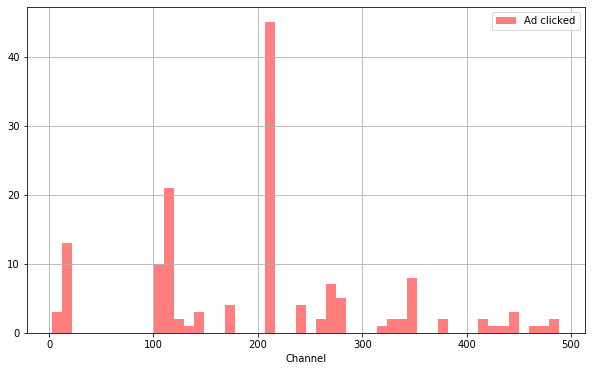

In [33]:
plt.figure(figsize=(10,6))
training_data[training_data['is_clicked']==1]['channel'].hist(alpha=0.5,color='red',
                                              bins=50,label='Ad clicked')
plt.legend()
plt.xlabel('Channel')

In [34]:
training_data[training_data['is_clicked']==1]['channel'].value_counts().head(5)

213    45
113    20
21     13
101    10
347     8
Name: channel, dtype: int64

Sprawdzono również, w jaką najczęściej reklamę wchodzili użytkownicy. Zdecydowanie przodowała ta z kodem 19. Na drugim miejscu była reklama z kodem 35, a na trzecim, ta z kodem 29.

Text(0.5, 0, 'Variant')

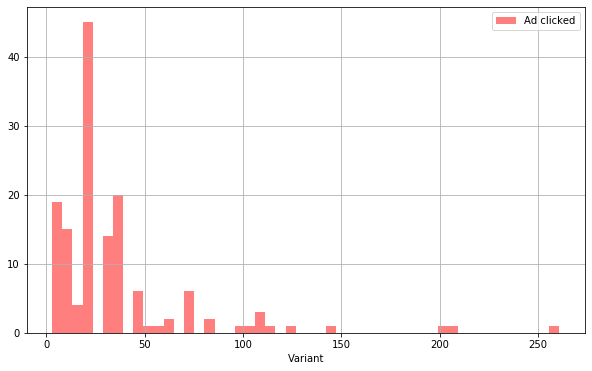

In [35]:
plt.figure(figsize=(10,6))
training_data[training_data['is_clicked']==1]['variant'].hist(alpha=0.5,color='red',
                                              bins=50,label='Ad clicked')
plt.legend()
plt.xlabel('Variant')

In [36]:
training_data[training_data['is_clicked']==1]['variant'].value_counts().head(5)

19    44
35    16
29    13
5     12
10     9
Name: variant, dtype: int64

Wzięto również pod uwagę urządzenie, z którego najczęściej użytkownicy wchodzili w reklamę. Głównie było to urządzenie z kodem 1. 

Text(0.5, 0, 'Device')

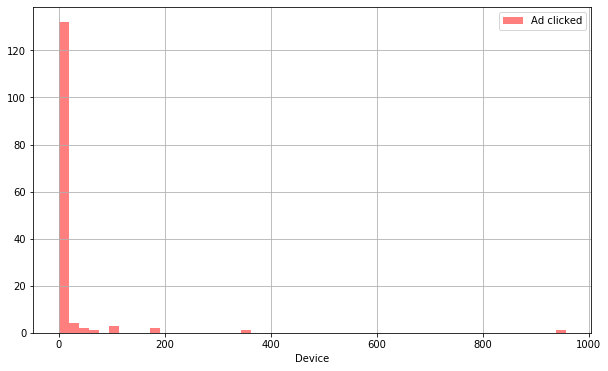

In [37]:
plt.figure(figsize=(10,6))
training_data[training_data['is_clicked']==1]['device'].hist(alpha=0.5,color='red',
                                              bins=50,label='Ad clicked')
plt.legend()
plt.xlabel('Device')

In [38]:
training_data[training_data['is_clicked']==1]['device'].value_counts().head(5)

1      94
0      34
16      2
21      2
188     1
Name: device, dtype: int64

Na koniec, przeanalizowano system operacyjny, który najczęśniej był używany w momencie kliknięcia użytkownika w reklamę. Były to głownie systemy opracyjne z kodem 19, 0, 13 i 24.

Text(0.5, 0, 'Operating system')

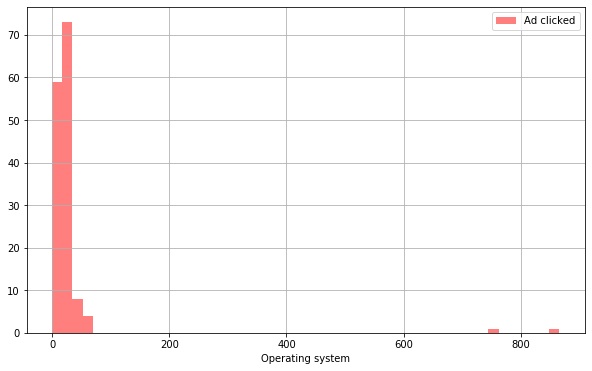

In [39]:
plt.figure(figsize=(10,6))
training_data[training_data['is_clicked']==1]['os'].hist(alpha=0.5,color='red',
                                              bins=50,label='Ad clicked')
plt.legend()
plt.xlabel('Operating system')

In [40]:
training_data[training_data['is_clicked']==1]['os'].value_counts().head(5)

19    22
0     17
13    16
24    15
29     9
Name: os, dtype: int64

# Modelowanie predykcyjne na próbie uczącej

W kolejnej częsci projektu, zabrano się za budowanie różnych modeli predykcyjnych w celu oszacowania pradopodobieństwa kliknięcia w reklamę przez użytkownika strony internetowej.

In [41]:
training_data.head()

,ip,variant,device,os,channel,click_time,is_clicked,Hour,Day of Week
76513,116708,3,1,15,135,2017-11-08 14:17:00,0,14,Wed
60406,167094,14,1,19,134,2017-11-08 17:26:00,0,17,Wed
27322,42192,2,1,19,477,2017-11-06 16:12:00,0,16,Mon
53699,45929,26,1,13,121,2017-11-07 11:34:00,0,11,Tue
65412,32356,232,3866,866,347,2017-11-09 02:16:00,0,2,Thu


In [42]:
training_data.columns

Index(['ip', 'variant', 'device', 'os', 'channel', 'click_time', 'is_clicked',
       'Hour', 'Day of Week'],
      dtype='object')

In [43]:
X = training_data[['ip', 'variant', 'device','os', 'channel']]
y = training_data['is_clicked']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Regresja logistyczna

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
logmodel = LogisticRegression()

In [47]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
probs = logmodel.predict_proba(X_test)

In [49]:
probs

array([[9.99994551e-01, 5.44905550e-06],
       [9.99966899e-01, 3.31009568e-05],
       [9.80620426e-01, 1.93795742e-02],
       ...,
       [9.99989235e-01, 1.07646035e-05],
       [9.99811296e-01, 1.88703610e-04],
       [9.99785639e-01, 2.14361315e-04]])

In [50]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix

In [51]:
y_pred = np.argmax(probs, axis=1)

In [52]:
y_true = np.array(y_test)

In [53]:
cm = confusion_matrix(y_true,y_pred)
print('Confusion Matrix : \n', cm)

print('\n')

total=sum(sum(cm))

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

print('\n')

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

print('\n')

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

print('\n')

precision = cm[0,0]/(cm[0,0]+cm[1,0])

f1 = (2*precision*sensitivity)/(precision+sensitivity)
print('F1 Score : ',f1)

Confusion Matrix : 
 [[20961     0]
 [   39     0]]


Accuracy :  0.9981428571428571


Sensitivity :  1.0


Specificity :  0.0


F1 Score :  0.9990705655251304


W przypadku regresji logistycznej dokładność modelu uplasowała się na poziomie 99.8%, przy czym czułość, czyli odsetek zdarzeń prawdziwie pozytywnych wyniosła 99.9%, a swoistość, czyli odsetek zdarzeń prawdziwie negatywnych 0.0%. Średnia harmoniczna (F1) wartości precyzji i czułości uplasowała się na poziomie 99.8%

In [54]:
probs = probs[:,1]

In [55]:
aucroc = roc_auc_score(y_test,probs)
print('Logistic Regression AUCROC : %.4f' % (aucroc))

Logistic Regression AUCROC : 0.5803


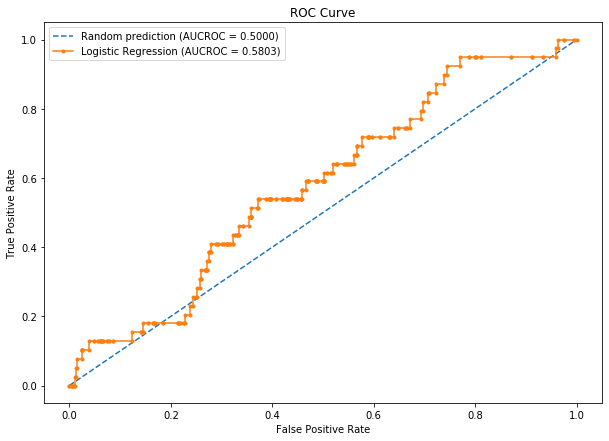

In [56]:
r_probs = [0 for _ in range(len(y_test))]
r_aucroc = roc_auc_score(y_test,r_probs)

r_fpr, r_tpr, _ = roc_curve(y_test,r_probs)
fpr, tpr, _ = roc_curve(y_test,probs)

plt.figure(figsize=(10,7))
plt.plot(r_fpr, r_tpr, linestyle = '--', label = 'Random prediction (AUCROC = %.4f)' % r_aucroc)
plt.plot(fpr, tpr, marker = '.', label = 'Logistic Regression (AUCROC = %.4f)' % aucroc)

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

W celu dokonania oceny modelu regresji logistycznej naszkicowano krzywą ROC oraz policzono dla niej pole po krzywą. Można wywnioskować, że model ten jest słabo dopasowany do naszych danych, ponieważ krzywa ROC jest bardzo bliska losowemu dopasowaniu, a pole pod krzywą zdecydowanie odbiega od 1, która wskazuje idealne dopasowanie modelu.

# Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rand_forest = RandomForestClassifier(n_estimators=100)

In [59]:
rand_forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [60]:
rand_forest_prob = rand_forest.predict_proba(X_test)

In [61]:
y_pred_rf = np.argmax(rand_forest_prob, axis=1)

In [62]:
y_true_rf = np.array(y_test)

In [63]:
cm2 = confusion_matrix(y_true_rf,y_pred_rf)
print('Confusion Matrix : \n', cm2)

print('\n')

total2=sum(sum(cm2))

accuracy_rf=(cm2[0,0]+cm2[1,1])/total2
print ('Accuracy : ', accuracy_rf)

print('\n')

sensitivity_rf = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity : ', sensitivity_rf )

print('\n')

specificity_rf = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity : ', specificity_rf)

print('\n')

precision_rf = cm2[0,0]/(cm2[0,0]+cm2[1,0])

f1_rf = (2*precision_rf*sensitivity_rf)/(precision_rf+sensitivity_rf)
print('F1 Score : ',f1)

Confusion Matrix : 
 [[20956     5]
 [   30     9]]


Accuracy :  0.9983333333333333


Sensitivity :  0.9997614617623205


Specificity :  0.23076923076923078


F1 Score :  0.9990705655251304


In [64]:
rand_forest_prob = rand_forest_prob[:,1]

In [65]:
aucroc2 = roc_auc_score(y_test,rand_forest_prob)
print('Random Forest AUCROC : %.4f' % (aucroc2))

Random Forest AUCROC : 0.9178


W przypadku modelu lasu losowego, pole pod krzywą jest stosunkowo bliskie 1, co świadczy o dobrze dopasowanym modelu. Dokładność modelu wynosi 99.8%, czułość 99.9%, a swoistość 23%. Średnia harmoniczna w modelu lasu losowego wynosi 99.8%.

# Gradient Boosting

In [66]:
from xgboost import XGBClassifier

In [67]:
xgboost = XGBClassifier()

In [68]:
xgboost.fit(X_train,y_train)

C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:35:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [69]:
xgboost_prob = xgboost.predict_proba(X_test)

In [70]:
y_pred_xgb = np.argmax(xgboost_prob, axis=1)
y_true_xgb = np.array(y_test)

In [71]:
cm3 = confusion_matrix(y_true_xgb,y_pred_xgb)
print('Confusion Matrix : \n', cm3)

print('\n')

total3=sum(sum(cm3))

accuracy_xgb=(cm3[0,0]+cm3[1,1])/total3
print ('Accuracy : ', accuracy_xgb)

print('\n')

sensitivity_xgb = cm3[0,0]/(cm3[0,0]+cm3[0,1])
print('Sensitivity : ', sensitivity_xgb )

print('\n')

specificity_xgb = cm3[1,1]/(cm3[1,0]+cm3[1,1])
print('Specificity : ', specificity_xgb)

print('\n')

precision_xgb = cm3[0,0]/(cm3[0,0]+cm3[1,0])

f1_rf = (2*precision_xgb*sensitivity_xgb)/(precision_xgb+sensitivity_xgb)
print('F1 Score : ',f1)

Confusion Matrix : 
 [[20955     6]
 [   30     9]]


Accuracy :  0.9982857142857143


Sensitivity :  0.9997137541147846


Specificity :  0.23076923076923078


F1 Score :  0.9990705655251304


In [72]:
xgboost_prob = xgboost_prob[:,1]

In [73]:
aucroc3 = roc_auc_score(y_test,xgboost_prob)
print('XGBoost AUCROC : %.4f' % (aucroc3))

XGBoost AUCROC : 0.9463


Pole pod krzywą ROC w przypadku boostingu gradientowego wyniosło 0.9463, co jest zdecydowanie póki co najlpeszym wynikiem, świadczącym o dobrze dopasowanym modelu. 

# CatBoost Model

In [74]:
from catboost import CatBoostClassifier

In [75]:
catboost = CatBoostClassifier(iterations=2,learning_rate=1,depth=2)

In [76]:
catboost.fit(X_train,y_train)

0:	learn: 0.1325475	total: 167ms	remaining: 167ms
1:	learn: 0.0506957	total: 179ms	remaining: 0us


In [77]:
catboost_prob = catboost.predict_proba(X_test)

In [78]:
y_pred_cb = np.argmax(catboost_prob, axis=1)
y_true_cb = np.array(y_test)

In [79]:
cm4 = confusion_matrix(y_true_cb,y_pred_cb)
print('Confusion Matrix : \n', cm4)

print('\n')

total4=sum(sum(cm4))

accuracy_cb=(cm4[0,0]+cm4[1,1])/total4
print ('Accuracy : ', accuracy_cb)

print('\n')

sensitivity_cb = cm4[0,0]/(cm4[0,0]+cm4[0,1])
print('Sensitivity : ', sensitivity_cb )

print('\n')

specificity_cb = cm4[1,1]/(cm4[1,0]+cm4[1,1])
print('Specificity : ', specificity_cb)

print('\n')

precision_cb = cm4[0,0]/(cm4[0,0]+cm4[1,0])

f1_rf = (2*precision_cb*sensitivity_cb)/(precision_cb+sensitivity_cb)
print('F1 Score : ',f1)

Confusion Matrix : 
 [[20961     0]
 [   39     0]]


Accuracy :  0.9981428571428571


Sensitivity :  1.0


Specificity :  0.0


F1 Score :  0.9990705655251304


In [80]:
catboost_prob = catboost_prob[:,1]

In [81]:
aucroc4 = roc_auc_score(y_test,catboost_prob)
print('CatBoost AUCROC : %.4f' % (aucroc4))

CatBoost AUCROC : 0.7287


Model CatBoost osiągnąl pole pod krzywą ROC w wysokości 0.7287, co świadczy o znacznie słabszym dopasowaniu modelu od poprzedniego.

# LightGBM Model

In [82]:
import lightgbm as lgb

In [83]:
lgbm = lgb.LGBMClassifier()

In [84]:
lgbm.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [85]:
lgbm_prob = lgbm.predict_proba(X_test)

In [86]:
y_pred_lgbm = np.argmax(lgbm_prob, axis=1)
y_true_lgbm = np.array(y_test)

In [87]:
cm5 = confusion_matrix(y_true_lgbm,y_pred_lgbm)
print('Confusion Matrix : \n', cm5)

print('\n')

total5=sum(sum(cm5))

accuracy_lgbm=(cm5[0,0]+cm5[1,1])/total5
print ('Accuracy : ', accuracy_lgbm)

print('\n')

sensitivity_lgbm = cm5[0,0]/(cm5[0,0]+cm5[0,1])
print('Sensitivity : ', sensitivity_lgbm )

print('\n')

specificity_lgbm = cm5[1,1]/(cm5[1,0]+cm5[1,1])
print('Specificity : ', specificity_lgbm)

print('\n')

precision_lgbm = cm5[0,0]/(cm5[0,0]+cm5[1,0])

f1_rf = (2*precision_lgbm*sensitivity_lgbm)/(precision_lgbm+sensitivity_lgbm)
print('F1 Score : ',f1)

Confusion Matrix : 
 [[20925    36]
 [   34     5]]


Accuracy :  0.9966666666666667


Sensitivity :  0.9982825246887076


Specificity :  0.1282051282051282


F1 Score :  0.9990705655251304


In [88]:
lgbm_prob = lgbm_prob[:,1]

In [89]:
aucroc5 = roc_auc_score(y_test,lgbm_prob)
print('LightGBM AUCROC : %.4f' % (aucroc5))

LightGBM AUCROC : 0.8132


Model LightGBM okazał się być nieco lepszym od modelu CatBoost z polem pod krzywą ROC wynoszącym 0.8132.

# Decision Tree

Zdecydowano się na zastosowanie drzewa decyzyjnego do badanych danych, ponieważ jest to ważne narzędzie w uczeniu maszynowym. Algorytm ten dobrze nadaje się do rozwiązywania problemu klasyfikacji, czyli w tym przypadku określenia czy użytkownik strony internetowej kliknął w reklamę, biorąc pod uwagę istotne zmienne.

In [90]:
from sklearn.tree import DecisionTreeClassifier

In [91]:
dtree = DecisionTreeClassifier()

In [92]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [93]:
dtree_prob = dtree.predict_proba(X_test)

In [94]:
y_pred_dtree = np.argmax(dtree_prob, axis=1)
y_true_dtree = np.array(y_test)

In [95]:
cm6 = confusion_matrix(y_true_dtree,y_pred_dtree)
print('Confusion Matrix : \n', cm6)

print('\n')

total6=sum(sum(cm6))

accuracy_dtree=(cm6[0,0]+cm6[1,1])/total6
print ('Accuracy : ', accuracy_dtree)

print('\n')

sensitivity_dtree = cm6[0,0]/(cm6[0,0]+cm6[0,1])
print('Sensitivity : ', sensitivity_dtree )

print('\n')

specificity_dtree = cm6[1,1]/(cm6[1,0]+cm6[1,1])
print('Specificity : ', specificity_dtree)

print('\n')

precision_dtree = cm6[0,0]/(cm6[0,0]+cm6[1,0])

f1_rf = (2*precision_dtree*sensitivity_dtree)/(precision_dtree+sensitivity_dtree)
print('F1 Score : ',f1)

Confusion Matrix : 
 [[20936    25]
 [   29    10]]


Accuracy :  0.9974285714285714


Sensitivity :  0.9988073088116025


Specificity :  0.2564102564102564


F1 Score :  0.9990705655251304


In [96]:
dtree_prob = dtree_prob[:,1]

In [97]:
aucroc6 = roc_auc_score(y_test,dtree_prob)
print('Decision Tree AUCROC : %.4f' % (aucroc6))

Decision Tree AUCROC : 0.6276


Model drzewa decyzyjnego dał znacznie słabszą predykcję, z polem pod krzywą wynoszącym 0.6276.

# Neural Network

Sieci neuronowe to zestaw algorytmów, luźno wzorowanych na ludzkim mózgu, które są zaprojektowane do rozpoznawania wzorców. Mogą być wykorzystywane do interpetacji danych jako metoda klasyfikacyjna. Zdecydowano się na zastosowanie tego algorytmu w badanym zbiorze, ponieważ chciano sprawdzić, jak zachowa się sieć neuronowa przy niezrównoważonej klasie.

In [98]:
from sklearn.neural_network import MLPClassifier

In [99]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)

In [100]:
clf.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [101]:
clf_prob = clf.predict_proba(X_test)

In [102]:
y_pred_clf = np.argmax(clf_prob, axis=1)
y_true_clf = np.array(y_test)

In [103]:
cm7 = confusion_matrix(y_true_clf,y_pred_clf)
print('Confusion Matrix : \n', cm7)

print('\n')

total7=sum(sum(cm7))

accuracy_clf=(cm7[0,0]+cm7[1,1])/total7
print ('Accuracy : ', accuracy_clf)

print('\n')

sensitivity_clf = cm7[0,0]/(cm7[0,0]+cm7[0,1])
print('Sensitivity : ', sensitivity_clf )

print('\n')

specificity_clf = cm7[1,1]/(cm7[1,0]+cm7[1,1])
print('Specificity : ', specificity_clf)

print('\n')

precision_clf = cm7[0,0]/(cm7[0,0]+cm7[1,0])

f1_rf = (2*precision_clf*sensitivity_clf)/(precision_clf+sensitivity_clf)
print('F1 Score : ',f1)

Confusion Matrix : 
 [[20957     4]
 [   39     0]]


Accuracy :  0.9979523809523809


Sensitivity :  0.9998091694098564


Specificity :  0.0


F1 Score :  0.9990705655251304


In [104]:
clf_prob = clf_prob[:,1]

In [105]:
aucroc7 = roc_auc_score(y_test,clf_prob)
print('Neural Network AUCROC : %.4f' % (aucroc7))

Neural Network AUCROC : 0.4974


Sieć neuronowa wypadła zdecydowanie najgorzej ze wszystkich dotychczasowych modeli z bardzo słabą predykcją oraz AUCROC wynoszącym 0.4974. 

# Gaussian Naive Bayes

Ostatnim modelem zastosowanym w badanym problemie klasyfikacyjnym jest naiwny klasyfikator bayesowski. Mimo, że są oparte na założeniu o o wzajemnej niezależności predyktorów, to i tak uchodzą za jeden z lepszych algorytmów klasyfikacyjnych. 

In [106]:
from sklearn.naive_bayes import GaussianNB

In [107]:
naive = GaussianNB()

In [108]:
naive.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [109]:
naive_prob = naive.predict_proba(X_test)

In [110]:
y_pred_naive = np.argmax(naive_prob, axis=1)
y_true_naive = np.array(y_test)

In [111]:
cm8 = confusion_matrix(y_true_naive,y_pred_naive)
print('Confusion Matrix : \n', cm8)

print('\n')

total8=sum(sum(cm8))

accuracy_naive=(cm8[0,0]+cm8[1,1])/total8
print ('Accuracy : ', accuracy_naive)

print('\n')

sensitivity_naive = cm8[0,0]/(cm8[0,0]+cm8[0,1])
print('Sensitivity : ', sensitivity_naive )

print('\n')

specificity_naive = cm8[1,1]/(cm8[1,0]+cm8[1,1])
print('Specificity : ', specificity_naive)

print('\n')

precision_naive = cm8[0,0]/(cm8[0,0]+cm8[1,0])

f1_rf = (2*precision_naive*sensitivity_naive)/(precision_naive+sensitivity_naive)
print('F1 Score : ',f1)

Confusion Matrix : 
 [[20847   114]
 [   32     7]]


Accuracy :  0.9930476190476191


Sensitivity :  0.9945613281809074


Specificity :  0.1794871794871795


F1 Score :  0.9990705655251304


In [112]:
naive_prob = naive_prob[:,1]

In [113]:
aucroc8 = roc_auc_score(y_test,naive_prob)
print('Gaussian Naive Bayes AUCROC : %.4f' % (aucroc8))

Gaussian Naive Bayes AUCROC : 0.8605


W przypadku modelu naiwnego klasyfikatora bayesowskiego, pole pod krzywą wyniosło 0.8605, co jest dobrym wynikiem, ale wciąż słabszym od chociażby lasu losowego, czy boostingu gradientowego.

# Porównanie mocy predykcyjnej wykorzystanych modeli na próbie uczącej

Krzywa ROC jest przydatnym narzędziem do przewidywania prawdopodobieństwa wyniku binarnego. Jest to wykres odsetka wyników fałszywie dodatnich w stosunku do odsetka wyników prawdziwie dodatnich dla wielu różnych kandydujących wartości progowych między 0,0 a 1,0. Wykreśla współczynnik fałszywych alarmów w stosunku do współczynnika trafień. Krzywa ROC jest użytecznym narzędziem z kilku powodów. Po pierwsze, krzywe różnych modeli można porównywać bezpośrednio ze sobą lub dla różnych progów. Po drugie, pole pod krzywą (AUC) można wykorzystać jako podsumowanie umiejętności modelowania. Pole pod krzywą określa prawdopodobieństwo tego, że losowo wybrany element klasy pozytywnej otrzyma wyższą wartość "score" niż losowo wybrany element klasy negatywnej. Poniżej zestawiono wszystkie wykorzystane algorytmy uczenia maszynowego na jednym wykresie, co umożliwi interpetację wyników.

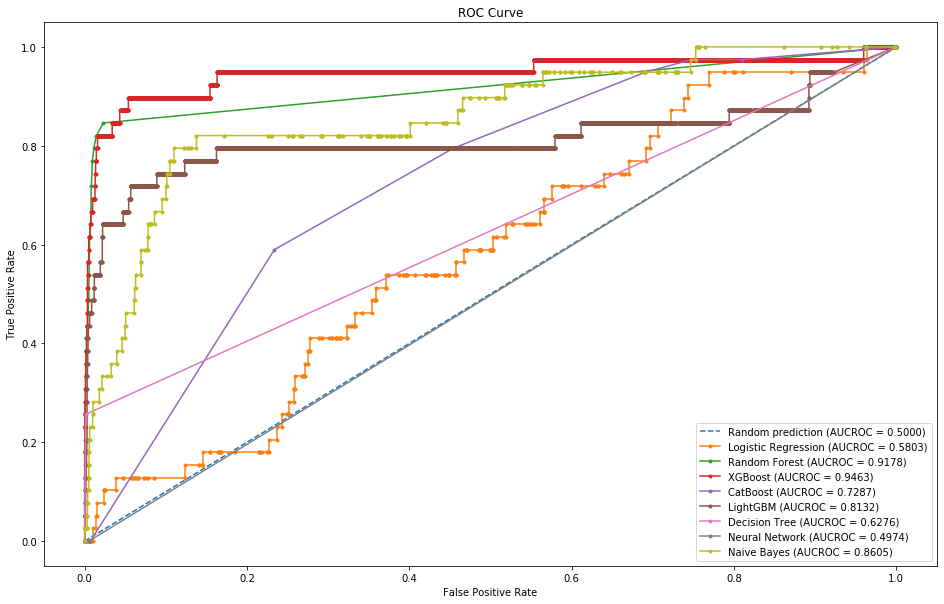

In [114]:
r_probs = [0 for _ in range(len(y_test))]
r_aucroc = roc_auc_score(y_test,r_probs)

#Random prediction
r_fpr, r_tpr, _ = roc_curve(y_test,r_probs)
#Logistic Regression
fpr, tpr, _ = roc_curve(y_test,probs)
#Random Forest
random_forest_fpr, random_forest_tpr, _ = roc_curve(y_test,rand_forest_prob)
#XGBoost
xgb_fpr, xgb_tpr, _ = roc_curve(y_test,xgboost_prob)
#CatBoost
catboost_fpr,catboost_tpr, _ = roc_curve(y_test,catboost_prob)
#LightGBM
lgbm_fpr, lgbm_tpr, _ = roc_curve(y_test,lgbm_prob)
#Decision Tree
dtree_fpr, dtree_tpr, _ = roc_curve(y_test,dtree_prob)
#Neural Network
clf_fpr, clf_tpr, _ = roc_curve(y_test,clf_prob)
#Naive Bayes
naive_fpr, naive_tpr, _ = roc_curve(y_test,naive_prob)

plt.figure(figsize=(16,10))

#Random prediction
plt.plot(r_fpr, r_tpr, linestyle = '--', label = 'Random prediction (AUCROC = %.4f)' % r_aucroc)
#Logistic Regression
plt.plot(fpr, tpr, marker = '.', label = 'Logistic Regression (AUCROC = %.4f)' % aucroc)
#Random Forest
plt.plot(random_forest_fpr, random_forest_tpr, marker = '.', label = 'Random Forest (AUCROC = %.4f)' % aucroc2)
#XGBoost
plt.plot(xgb_fpr, xgb_tpr, marker = '.', label = 'XGBoost (AUCROC = %.4f)' % aucroc3)
#CatBoost
plt.plot(catboost_fpr, catboost_tpr, marker = '.', label = 'CatBoost (AUCROC = %.4f)' % aucroc4)
#LightGBM
plt.plot(lgbm_fpr, lgbm_tpr, marker = '.', label = 'LightGBM (AUCROC = %.4f)' % aucroc5)
#Decision Tree
plt.plot(dtree_fpr, dtree_tpr, marker = '.', label = 'Decision Tree (AUCROC = %.4f)' % aucroc6)
#Neural Network
plt.plot(clf_fpr, clf_tpr, marker = '.', label = 'Neural Network (AUCROC = %.4f)' % aucroc7)
#Naive Bayes
plt.plot(naive_fpr, naive_tpr, marker = '.', label = 'Naive Bayes (AUCROC = %.4f)' % aucroc8)

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

Biorąc pod uwagę powyższy wykres, można wywnioskować jak oddziaływały badane algorytmy na badanym zbiorze danych. Najlepszym modelem okazał się boosting gradientowy. Pole pod krzywą dla tego algorytmu wyniosło 0.9463, co stanowi najwyższy wynik spośród pozostałych algorytmów i jest on najbardziej zbliżony do 1. W czołówce znajduje się też algorytm lasu losowego, który również osiągnął AUCROC powyżej 0.9 oraz algorytm naiwnego klasyfikatora bayesowskiego z polem pod krzywą 0.8605. Najgorszym modelem okazała się sieć neuronowa która poradziła sobie niemalże tak samo, jak losowa próba. Badanego zbioru danych nie powinno się również wykorzystywać w modelach regresji logistycznej oraz drzewa decyzyjnego, gdyż okazały się one również słabo dopasowane.

# Generowanie prognoz dla próby testowej

In [115]:
testing_data.head()

,ip,variant,device,os,channel,click_time,is_clicked,Hour,Day of Week
75721,48240,14,1,35,480,2017-11-09 14:28:00,0,14,Thu
80184,88629,2,1,22,477,2017-11-08 18:52:00,0,18,Wed
19864,48063,11,1,12,481,2017-11-09 14:41:00,0,14,Thu
76699,107097,23,1,13,153,2017-11-09 10:51:00,0,10,Thu
92991,20411,26,1,32,121,2017-11-09 12:24:00,0,12,Thu


In [116]:
X = testing_data[['ip', 'variant', 'device','os', 'channel']]
y = testing_data['is_clicked']

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Regresja logistyczna

In [118]:
logmodel = LogisticRegression()

In [119]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [120]:
probs = logmodel.predict_proba(X_test)

In [121]:
y_pred = np.argmax(probs, axis=1)
y_true = np.array(y_test)

In [122]:
cm = confusion_matrix(y_true,y_pred)
print('Confusion Matrix : \n', cm)

print('\n')

total=sum(sum(cm))

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

print('\n')

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

print('\n')

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

print('\n')

precision = cm[0,0]/(cm[0,0]+cm[1,0])

f1 = (2*precision*sensitivity)/(precision+sensitivity)
print('F1 Score : ',f1)

Confusion Matrix : 
 [[8970    3]
 [  27    0]]


Accuracy :  0.9966666666666667


Sensitivity :  0.9996656636576395


Specificity :  0.0


F1 Score :  0.9983305509181969


In [123]:
probs = probs[:,1]

In [124]:
aucroc = roc_auc_score(y_test,probs)
print('Logistic Regression AUCROC : %.4f' % (aucroc))

Logistic Regression AUCROC : 0.5405


# Random Forest

In [125]:
X.head()

,ip,variant,device,os,channel
75721,48240,14,1,35,480
80184,88629,2,1,22,477
19864,48063,11,1,12,481
76699,107097,23,1,13,153
92991,20411,26,1,32,121


In [126]:
rand_forest = RandomForestClassifier(n_estimators=100)

In [127]:
rand_forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [128]:
rand_forest_prob = rand_forest.predict_proba(X_test)

In [129]:
y_pred_rf = np.argmax(rand_forest_prob, axis=1)
y_true_rf = np.array(y_test)

In [130]:
cm2 = confusion_matrix(y_true_rf,y_pred_rf)
print('Confusion Matrix : \n', cm2)

print('\n')

total2=sum(sum(cm2))

accuracy_rf=(cm2[0,0]+cm2[1,1])/total2
print ('Accuracy : ', accuracy_rf)

print('\n')

sensitivity_rf = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity : ', sensitivity_rf )

print('\n')

specificity_rf = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity : ', specificity_rf)

print('\n')

precision_rf = cm2[0,0]/(cm2[0,0]+cm2[1,0])

f1_rf = (2*precision_rf*sensitivity_rf)/(precision_rf+sensitivity_rf)
print('F1 Score : ',f1)

Confusion Matrix : 
 [[8969    4]
 [  21    6]]


Accuracy :  0.9972222222222222


Sensitivity :  0.9995542182101861


Specificity :  0.2222222222222222


F1 Score :  0.9983305509181969


In [131]:
rand_forest_prob = rand_forest_prob[:,1]

In [132]:
aucroc2 = roc_auc_score(y_test,rand_forest_prob)
print('Random Forest AUCROC : %.4f' % (aucroc2))

Random Forest AUCROC : 0.8996


# Gradient Boosting

In [133]:
xgboost = XGBClassifier()

In [134]:
xgboost.fit(X_train,y_train)

C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:37:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [135]:
xgboost_prob = xgboost.predict_proba(X_test)

In [136]:
y_pred_xgb = np.argmax(xgboost_prob, axis=1)
y_true_xgb = np.array(y_test)

In [137]:
cm3 = confusion_matrix(y_true_xgb,y_pred_xgb)
print('Confusion Matrix : \n', cm3)

print('\n')

total3=sum(sum(cm3))

accuracy_xgb=(cm3[0,0]+cm3[1,1])/total3
print ('Accuracy : ', accuracy_xgb)

print('\n')

sensitivity_xgb = cm3[0,0]/(cm3[0,0]+cm3[0,1])
print('Sensitivity : ', sensitivity_xgb )

print('\n')

specificity_xgb = cm3[1,1]/(cm3[1,0]+cm3[1,1])
print('Specificity : ', specificity_xgb)

print('\n')

precision_xgb = cm3[0,0]/(cm3[0,0]+cm3[1,0])

f1_xgb = (2*precision_xgb*sensitivity_xgb)/(precision_xgb+sensitivity_xgb)
print('F1 Score : ',f1)

Confusion Matrix : 
 [[8969    4]
 [  18    9]]


Accuracy :  0.9975555555555555


Sensitivity :  0.9995542182101861


Specificity :  0.3333333333333333


F1 Score :  0.9983305509181969


In [138]:
xgboost_prob = xgboost_prob[:,1]

In [139]:
aucroc3 = roc_auc_score(y_test,xgboost_prob)
print('XGBoost AUCROC : %.4f' % (aucroc3))

XGBoost AUCROC : 0.9294


# CatBoost Model

In [140]:
catboost = CatBoostClassifier(iterations=2,learning_rate=1,depth=2)

In [141]:
catboost.fit(X_train,y_train)

0:	learn: 0.1338066	total: 3.29ms	remaining: 3.29ms
1:	learn: 0.0523149	total: 6.4ms	remaining: 0us


In [142]:
catboost_prob = catboost.predict_proba(X_test)

In [143]:
y_pred_cb = np.argmax(catboost_prob, axis=1)
y_true_cb = np.array(y_test)

In [144]:
cm4 = confusion_matrix(y_true_cb,y_pred_cb)
print('Confusion Matrix : \n', cm4)

print('\n')

total4=sum(sum(cm4))

accuracy_cb=(cm4[0,0]+cm4[1,1])/total4
print ('Accuracy : ', accuracy_cb)

print('\n')

sensitivity_cb = cm4[0,0]/(cm4[0,0]+cm4[0,1])
print('Sensitivity : ', sensitivity_cb )

print('\n')

specificity_cb = cm4[1,1]/(cm4[1,0]+cm4[1,1])
print('Specificity : ', specificity_cb)

print('\n')

precision_cb = cm4[0,0]/(cm4[0,0]+cm4[1,0])

f1_cb = (2*precision_cb*sensitivity_cb)/(precision_cb+sensitivity_cb)
print('F1 Score : ',f1)

Confusion Matrix : 
 [[8973    0]
 [  27    0]]


Accuracy :  0.997


Sensitivity :  1.0


Specificity :  0.0


F1 Score :  0.9983305509181969


In [145]:
catboost_prob = catboost_prob[:,1]

In [146]:
aucroc4 = roc_auc_score(y_test,catboost_prob)
print('CatBoost AUCROC : %.4f' % (aucroc4))

CatBoost AUCROC : 0.6811


# LightGBM Model

In [147]:
lgbm = lgb.LGBMClassifier()

In [148]:
lgbm.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [149]:
lgbm_prob = lgbm.predict_proba(X_test)

In [150]:
y_pred_lgbm = np.argmax(lgbm_prob, axis=1)
y_true_lgbm = np.array(y_test)

In [151]:
cm5 = confusion_matrix(y_true_lgbm,y_pred_lgbm)
print('Confusion Matrix : \n', cm5)

print('\n')

total5=sum(sum(cm5))

accuracy_lgbm=(cm5[0,0]+cm5[1,1])/total5
print ('Accuracy : ', accuracy_lgbm)

print('\n')

sensitivity_lgbm = cm5[0,0]/(cm5[0,0]+cm5[0,1])
print('Sensitivity : ', sensitivity_lgbm )

print('\n')

specificity_lgbm = cm5[1,1]/(cm5[1,0]+cm5[1,1])
print('Specificity : ', specificity_lgbm)

print('\n')

precision_lgbm = cm5[0,0]/(cm5[0,0]+cm5[1,0])

f1_lgbm = (2*precision_lgbm*sensitivity_lgbm)/(precision_lgbm+sensitivity_lgbm)
print('F1 Score : ',f1)

Confusion Matrix : 
 [[8968    5]
 [  18    9]]


Accuracy :  0.9974444444444445


Sensitivity :  0.9994427727627326


Specificity :  0.3333333333333333


F1 Score :  0.9983305509181969


In [152]:
lgbm_prob = lgbm_prob[:,1]

In [153]:
aucroc5 = roc_auc_score(y_test,lgbm_prob)
print('LightGBM AUCROC : %.4f' % (aucroc5))

LightGBM AUCROC : 0.8404


# Decision Tree

In [154]:
dtree = DecisionTreeClassifier()

In [155]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [156]:
dtree_prob = dtree.predict_proba(X_test)

In [157]:
y_pred_dtree = np.argmax(dtree_prob, axis=1)
y_true_dtree = np.array(y_test)

In [158]:
cm6 = confusion_matrix(y_true_dtree,y_pred_dtree)
print('Confusion Matrix : \n', cm6)

print('\n')

total6=sum(sum(cm6))

accuracy_dtree=(cm6[0,0]+cm6[1,1])/total6
print ('Accuracy : ', accuracy_dtree)

print('\n')

sensitivity_dtree = cm6[0,0]/(cm6[0,0]+cm6[0,1])
print('Sensitivity : ', sensitivity_dtree )

print('\n')

specificity_dtree = cm6[1,1]/(cm6[1,0]+cm6[1,1])
print('Specificity : ', specificity_dtree)

print('\n')

precision_dtree = cm6[0,0]/(cm6[0,0]+cm6[1,0])

f1_dtree = (2*precision_dtree*sensitivity_dtree)/(precision_dtree+sensitivity_dtree)
print('F1 Score : ',f1)

Confusion Matrix : 
 [[8956   17]
 [  17   10]]


Accuracy :  0.9962222222222222


Sensitivity :  0.998105427393291


Specificity :  0.37037037037037035


F1 Score :  0.9983305509181969


In [159]:
dtree_prob = dtree_prob[:,1]

In [160]:
aucroc6 = roc_auc_score(y_test,dtree_prob)
print('Decision Tree AUCROC : %.4f' % (aucroc6))

Decision Tree AUCROC : 0.6842


# Neural Networks

In [161]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)

In [162]:
clf.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [163]:
clf_prob = clf.predict_proba(X_test)

In [164]:
y_pred_clf = np.argmax(clf_prob, axis=1)
y_true_clf = np.array(y_test)

In [165]:
cm7 = confusion_matrix(y_true_clf,y_pred_clf)
print('Confusion Matrix : \n', cm7)

print('\n')

total7=sum(sum(cm7))

accuracy_clf=(cm7[0,0]+cm7[1,1])/total7
print ('Accuracy : ', accuracy_clf)

print('\n')

sensitivity_clf = cm7[0,0]/(cm7[0,0]+cm7[0,1])
print('Sensitivity : ', sensitivity_clf )

print('\n')

specificity_clf = cm7[1,1]/(cm7[1,0]+cm7[1,1])
print('Specificity : ', specificity_clf)

print('\n')

precision_clf = cm7[0,0]/(cm7[0,0]+cm7[1,0])

f1_clf = (2*precision_clf*sensitivity_clf)/(precision_clf+sensitivity_clf)
print('F1 Score : ',f1)

Confusion Matrix : 
 [[8970    3]
 [  27    0]]


Accuracy :  0.9966666666666667


Sensitivity :  0.9996656636576395


Specificity :  0.0


F1 Score :  0.9983305509181969


In [166]:
clf_prob = clf_prob[:,1]

In [167]:
aucroc7 = roc_auc_score(y_test,clf_prob)
print('Neural Network AUCROC : %.4f' % (aucroc7))

Neural Network AUCROC : 0.4965


# Gaussian Naive Bayes

In [168]:
naive = GaussianNB()

In [169]:
naive.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [170]:
naive_prob = naive.predict_proba(X_test)

In [171]:
y_pred_naive = np.argmax(naive_prob, axis=1)
y_true_naive = np.array(y_test)

In [172]:
cm8 = confusion_matrix(y_true_naive,y_pred_naive)
print('Confusion Matrix : \n', cm8)

print('\n')

total8=sum(sum(cm8))

accuracy_naive=(cm8[0,0]+cm8[1,1])/total8
print ('Accuracy : ', accuracy_naive)

print('\n')

sensitivity_naive = cm8[0,0]/(cm8[0,0]+cm8[0,1])
print('Sensitivity : ', sensitivity_naive )

print('\n')

specificity_naive = cm8[1,1]/(cm8[1,0]+cm8[1,1])
print('Specificity : ', specificity_naive)

print('\n')

precision_naive = cm8[0,0]/(cm8[0,0]+cm8[1,0])

f1_naive = (2*precision_naive*sensitivity_naive)/(precision_naive+sensitivity_naive)
print('F1 Score : ',f1)

Confusion Matrix : 
 [[8909   64]
 [  22    5]]


Accuracy :  0.9904444444444445


Sensitivity :  0.9928674913629778


Specificity :  0.18518518518518517


F1 Score :  0.9983305509181969


In [173]:
naive_prob = naive_prob[:,1]

In [174]:
aucroc8 = roc_auc_score(y_test,naive_prob)
print('Gaussian Naive Bayes AUCROC : %.4f' % (aucroc8))

Gaussian Naive Bayes AUCROC : 0.7797


In [175]:
comp = pd.DataFrame(index=[['Accuracy','Sensitivity','Specificity','Precision','F1 Score']],columns=['Logistic Regression'])

In [176]:
comp.iloc[0] = accuracy
comp.iloc[1] = sensitivity
comp.iloc[2] = specificity
comp.iloc[3] = precision
comp.iloc[4] = f1

In [177]:
comp['Random Forest'] = accuracy_rf,sensitivity_rf,specificity_rf,precision_rf,f1_rf
comp['Gradient Boosting'] = accuracy_xgb,sensitivity_xgb,specificity_xgb,precision_xgb,f1_xgb
comp['CatBoost Model'] = accuracy_cb,sensitivity_cb,specificity_cb,precision_cb,f1_cb
comp['LightGBM Model'] = accuracy_lgbm,sensitivity_lgbm,specificity_lgbm,precision_lgbm,f1_lgbm
comp['Decision Tree'] = accuracy_dtree,sensitivity_dtree,specificity_dtree,precision_dtree,f1_dtree
comp['Neural Network'] = accuracy_clf,sensitivity_clf,specificity_clf,precision_clf,f1_clf
comp['Guassian Naive Bayes'] = accuracy_naive,sensitivity_naive,specificity_naive,precision_naive,f1_naive

In [178]:
comp

,Logistic Regression,Random Forest,Gradient Boosting,CatBoost Model,LightGBM Model,Decision Tree,Neural Network,Guassian Naive Bayes
Accuracy,0.996667,0.997222,0.997556,0.997000,0.997444,0.996222,0.996667,0.990444
Sensitivity,0.999666,0.999554,0.999554,1.000000,0.999443,0.998105,0.999666,0.992867
Specificity,0,0.222222,0.333333,0.000000,0.333333,0.370370,0.000000,0.185185
Precision,0.996999,0.997664,0.997997,0.997000,0.997997,0.998105,0.996999,0.997537
F1 Score,0.998331,0.998608,0.998775,0.998498,0.998719,0.998105,0.998331,0.995197


W powyższej tabeli widać zestawienie poszczególnych prognoz pod względem wybranych charakterystyk. Można zauważyć, że dokładność we wszystkich badanych modelach plasowała się na podobnym poziomie. Najlepszy wynik uzyskał model boostingu gradientowego w wysokości 99.76%. Najsłabiej zaś wypadł naiwny klasyfikator bayesowski z wynikiem 99%. Jeśli chodzi o czułość, czyli odsetek zdarzeń prawdziwie pozytywnych, najlepszy wynik uzyskał model CatBoost i wynosił on 100%. Badając swoistość, najwyższy wynik uzyskało drzewo decyzyjne w wysokości 40.7%, a najniższy regresja logistyczna wrac z siecią neuronową w wysokości 0%. Precyzja, podobnie jak w przypadku dokładności, wyglądała podobnie we wszystkich modelach. Najlepszym z nich okazało się być drzewo decyzyjne z wynikiem 99.82%, a nasłabszym regresja logistyczna z siecią neuronową z wynikiem 99.7%. Łatwo można sobie wyobrazić, jak małe różnice w przypadku prezycji tutaj występują. Patrząć na wyniki F1, czyli średniej harmonicznej wartości precision i recall widać, że najlepszy wynik uzyskał model boostingu gradientowego z wynikiem 99.877%, natomiast względnie najsłabiej wypadł naiwny klasyfikator bayesowski z wynikiem 99.5%.

# Porównanie mocy predykcyjnej wykorzystanych modeli na próbie testowej

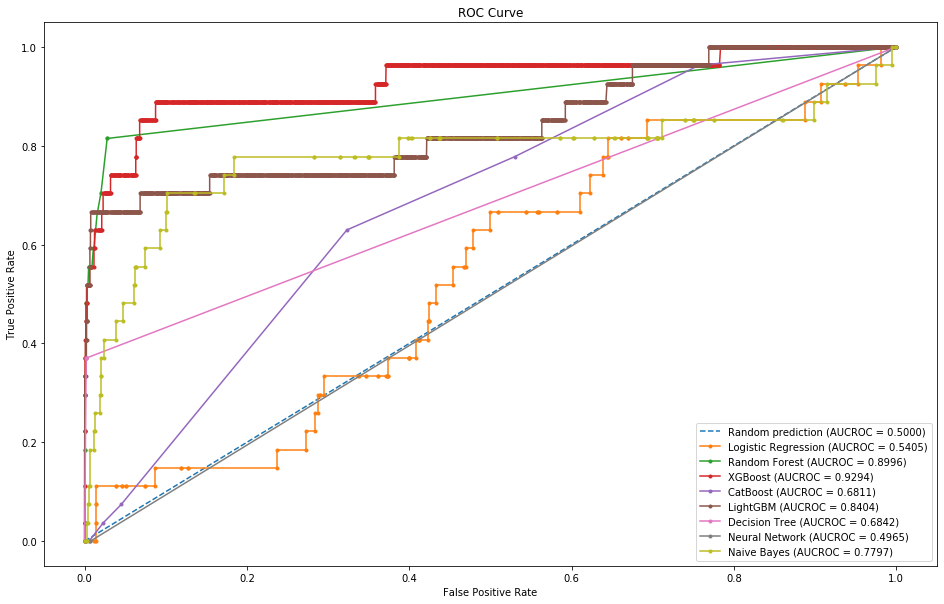

In [179]:
r_probs = [0 for _ in range(len(y_test))]
r_aucroc = roc_auc_score(y_test,r_probs)

#Random prediction
r_fpr, r_tpr, _ = roc_curve(y_test,r_probs)
#Logistic Regression
fpr, tpr, _ = roc_curve(y_test,probs)
#Random Forest
random_forest_fpr, random_forest_tpr, _ = roc_curve(y_test,rand_forest_prob)
#XGBoost
xgb_fpr, xgb_tpr, _ = roc_curve(y_test,xgboost_prob)
#CatBoost
catboost_fpr,catboost_tpr, _ = roc_curve(y_test,catboost_prob)
#LightGBM
lgbm_fpr, lgbm_tpr, _ = roc_curve(y_test,lgbm_prob)
#Decision Tree
dtree_fpr, dtree_tpr, _ = roc_curve(y_test,dtree_prob)
#Neural Network
clf_fpr, clf_tpr, _ = roc_curve(y_test,clf_prob)
#Naive Bayes
naive_fpr, naive_tpr, _ = roc_curve(y_test,naive_prob)

plt.figure(figsize=(16,10))

#Random prediction
plt.plot(r_fpr, r_tpr, linestyle = '--', label = 'Random prediction (AUCROC = %.4f)' % r_aucroc)
#Logistic Regression
plt.plot(fpr, tpr, marker = '.', label = 'Logistic Regression (AUCROC = %.4f)' % aucroc)
#Random Forest
plt.plot(random_forest_fpr, random_forest_tpr, marker = '.', label = 'Random Forest (AUCROC = %.4f)' % aucroc2)
#XGBoost
plt.plot(xgb_fpr, xgb_tpr, marker = '.', label = 'XGBoost (AUCROC = %.4f)' % aucroc3)
#CatBoost
plt.plot(catboost_fpr, catboost_tpr, marker = '.', label = 'CatBoost (AUCROC = %.4f)' % aucroc4)
#LightGBM
plt.plot(lgbm_fpr, lgbm_tpr, marker = '.', label = 'LightGBM (AUCROC = %.4f)' % aucroc5)
#Decision Tree
plt.plot(dtree_fpr, dtree_tpr, marker = '.', label = 'Decision Tree (AUCROC = %.4f)' % aucroc6)
#Neural Network
plt.plot(clf_fpr, clf_tpr, marker = '.', label = 'Neural Network (AUCROC = %.4f)' % aucroc7)
#Naive Bayes
plt.plot(naive_fpr, naive_tpr, marker = '.', label = 'Naive Bayes (AUCROC = %.4f)' % aucroc8)

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

Analizując wykres dla próby testowej, można zauważyć, że tak jak samo jak przy próbie uczącej, najlepszym modelem okazał się być boosting gradientowy. Pole pod krzywą wyniosło dla tego algorytmu 0.9294, co jest naprawdę dobrym wynikiem i świadczy o dobrze dopasowanym modelu. Również tak samo jak w przypadku próby uczącej, na drugim miejscu plasuje się algorytm lasu losowego z AUCROC powyżej 0.9. Z kolei trzecim najlepszym modelem jest w przypadku próby testowej, algorytm LightGBM z polem pod krzywą wynoszącym 0.8404. Najgorszymi modelami okazały się być algorytmy sieci neuronowej oraz regresji logistycznej, dla których pole pod krzywą wyniosło blisko 0.5.

# Improving the performance of different models

W celu poprawy wydajności algorytmów uczenia maszynowego, warto zastosować metodę baggingu. Bagging to metaalgorytm uczenia maszynowego, który umożliwia poprawę stabilności i dokładności algorytmów uczenia maszynowego wykorzystywanych m.in w celach klasyfikacyjnych. Zmniejsza on również wariancję i pomaga uniknąć nadmiernego dopasowania . Bagging składa się z dwóch części: agregacji i bootstrapping'u. Bootstrapping to metoda próbkowania, w której próbkę wybiera się z zestawu metodą zastępczą. Algorytm uczenia jest następnie uruchamiany na wybranych próbkach. W bootstrpping'u wykorzystuje się próbkowanie z wymianą, aby procedura selekcji była całkowicie losowa. Gdy próba jest wybierana bez zamiany, kolejne selekcje zmiennych są zawsze zależne od poprzednich selekcji, co sprawia, że kryteria są nielosowe. Prognozy modelu podlegają agregacji w celu połączenia ich w celu uzyskania ostatecznej prognozy uwzględniającej wszystkie możliwe wyniki. Agregację można przeprowadzić na podstawie łącznej liczby wyników lub prawdopodobieństwa predykcji pochodzących z bootstrapping'u każdego modelu w procedurze.

Aby poprawić wydajność modelu, można też zastosować regularyzację, która zapobiega nadmiernemu dopasowaniu. Overfitting ma miejsce, gdy model uczy się bardzo specyficznego wzorca i szumu z danych treningowych do tego stopnia, że negatywnie wpływa to na zdolność naszego modelu do uogólniania naszych danych treningowych na nowe dane. Przez szum rozumiemy nieistotne informacje lub losowość w zbiorze danych. Ogólnie rzecz biorąc, regularyzacja oznacza uczynienie rzeczy regularnymi lub akceptowalnymi. W kontekście uczenia maszynowego regularyzacja to proces, który reguluje lub zmniejsza współczynniki do zera. Dzięki temu zniechęca do uczenia się bardziej złożonego lub elastycznego modelu, aby zapobiec nadmiernemu dopasowaniu.

# Assessment of the variables

Ważność zmiennych odnosi się do technik, które przypisują ocenę do zmiennych wejściowych na podstawie ich przydatności w przewidywaniu zmiennej docelowej. Oceny ważności zmiennych można obliczyć dla problemów, które obejmują przewidywanie wartości liczbowej oraz tych, które obejmują zadania klasyfikacyjne. 

Oceny ważności zmiennych mogą zapewnić wgląd w model. Większość ocen ważności jest obliczana przez model predykcyjny, który został dopasowany do zestawu danych. Sprawdzanie wyniku ważności zapewnia wgląd w ten konkretny model i które zmienne są najważniejsze, a które najmniej ważne dla modelu podczas dokonywania prognozy. Jest to rodzaj interpretacji modelu, który można przeprowadzić dla tych modeli, które go wspierają.

Ważność funkcji można wykorzystać również do ulepszenia modelu predykcyjnego. Można to osiągnąć, korzystając z ocen ważności, aby wybrać te zmienne do usunięcia, które mają najniższe wyniki, lub te, które mają zostać zachowane (najwyższe wyniki). Jest to rodzaj wyboru zmiennych i może uprościć modelowany problem, przyspieszyć proces modelowania, a w niektórych przypadkach poprawić wydajność modelu.